In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite") #sqlite:///hawaii.sqlite

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [11]:
inspect = inspect(engine)
inspect.get_table_names()

['measurement', 'station']

In [12]:
columns = inspect.get_columns('measurement')
for column in columns:
    print(column['name'], column['type'])


id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [13]:
columns = inspect.get_columns('station')
for column in columns:
    print(column['name'], column['type'])


id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [19]:
result = session.execute('SELECT count(*) FROM measurement').fetchall()
print(result)

[(19550,)]


In [20]:
# Find the most recent date in the data set.
most_recent = session.execute('SELECT MAX(date) FROM measurement').fetchall()
print(most_recent)

[('2017-08-23',)]


In [26]:
#dates = session.execute("'SELECT date FROM measurement where date ilike '2020%'").fetchall()
dates = session.execute('SELECT date FROM measurement limit 10').fetchall()
print(dates)

[('2010-01-01',), ('2010-01-02',), ('2010-01-03',), ('2010-01-04',), ('2010-01-06',), ('2010-01-07',), ('2010-01-08',), ('2010-01-09',), ('2010-01-10',), ('2010-01-11',)]


In [ ]:
# Query Emojis for `emoji_char`, `emoji_id`, and `score` and save the query into results
results = session.query(Emoji.emoji_char, Emoji.emoji_id, Emoji.score).\
    order_by(Emoji.score.desc()).all()

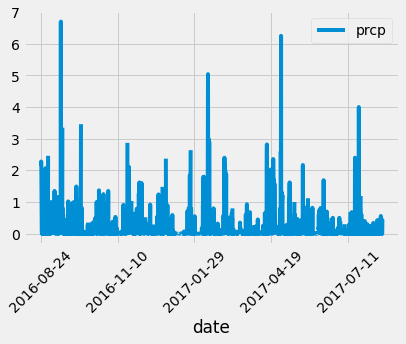

In [37]:
import datetime
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
end_date = datetime.datetime(2017, 8, 23)
start_date = end_date - datetime.timedelta(days = 365)
#print(start_date)


# Perform a query to retrieve the data and precipitation scores

prcp_results = session.query(measurement.date, measurement.prcp)\
.filter(measurement.date>= start_date).all()
#print(prcp_results)
# Save the query results as a Pandas DataFrame and set the index to the date column

prcp_df = pd.DataFrame(prcp_results)

# Sort the dataframe by date
prcp_df = prcp_df.sort_values("date")
#prcp_df
# Use Pandas Plotting with Matplotlib to plot the data

prcp_df.plot(x= "date", rot= 45)


In [39]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp_df.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [40]:
# Design a query to calculate the total number stations in the dataset
station_quantity = session.execute('SELECT count(distinct station) FROM station').fetchall()
print(station_quantity)


[(9,)]


In [49]:
stationss = session.execute('SELECT station FROM station ;').fetchall()
stationss

[('USC00519397',),
 ('USC00513117',),
 ('USC00514830',),
 ('USC00517948',),
 ('USC00518838',),
 ('USC00519523',),
 ('USC00519281',),
 ('USC00511918',),
 ('USC00516128',)]

In [48]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
active_stations = session.execute('SELECT station, count(station) FROM station GROUP BY station ORDER BY count(station) DESC;').fetchall()
active_stations

[('USC00519523', 1),
 ('USC00519397', 1),
 ('USC00519281', 1),
 ('USC00518838', 1),
 ('USC00517948', 1),
 ('USC00516128', 1),
 ('USC00514830', 1),
 ('USC00513117', 1),
 ('USC00511918', 1)]

In [ ]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


In [ ]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close session

In [ ]:
# Close Session
session.close()